In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:

# Load breast cancer data
bc = datasets.load_breast_cancer()
x, y = bc.data, bc.target

n_samples, n_features = x.shape
print(n_samples, n_features)



569 30


In [3]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

In [4]:
# Standardize features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [5]:
# Convert to tensors
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32)).view(-1, 1)
y_test = torch.from_numpy(y_test.astype(np.float32))

In [6]:
# Logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

model = LogisticRegression(n_features)

In [7]:
# Loss function and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [8]:
# Training loop
num_epochs = 200
loss_values = []  # List to store loss values
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(x_train)
    loss = criterion(y_predicted, y_train)
    loss_values.append(loss.item())

    # Backward pass and update
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss: {loss.item():.3f}')

epoch: 10, loss: 0.505
epoch: 20, loss: 0.430
epoch: 30, loss: 0.379
epoch: 40, loss: 0.343
epoch: 50, loss: 0.315
epoch: 60, loss: 0.293
epoch: 70, loss: 0.275
epoch: 80, loss: 0.260
epoch: 90, loss: 0.247
epoch: 100, loss: 0.236
epoch: 110, loss: 0.226
epoch: 120, loss: 0.218
epoch: 130, loss: 0.210
epoch: 140, loss: 0.203
epoch: 150, loss: 0.197
epoch: 160, loss: 0.191
epoch: 170, loss: 0.186
epoch: 180, loss: 0.181
epoch: 190, loss: 0.177
epoch: 200, loss: 0.172


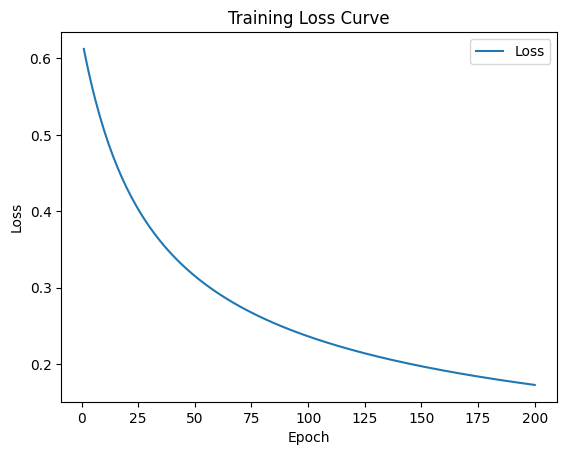

In [9]:
# Plot the loss curve
plt.plot(range(1, num_epochs + 1), loss_values, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()